###Continued Notebook

To classify the reviews to be either positive or negative

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf


In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
encoder = info.features['text'].encoder

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ4C2GO/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ4C2GO/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ4C2GO/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


Encoder: reduced dimensional representation of words, and keep some relations betweeen words.

In [0]:
# Global variables
BUFFER_SIZE = 10000
BATCH_SIZE = 64
# To modify the length of the reviews
padded_shape = ([None],())


In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE,
                                                                padded_shapes=padded_shape)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, 
                                         padded_shapes=padded_shape)


In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(encoder.vocab_size,64),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dense(64, activation= 'relu'),
  tf.keras.layers.Dense(1)
])

In [0]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset,
                    validation_steps=30    )




Epoch 1/5
391/391 [==============================] - 65s 165ms/step - loss: 0.6529 - accuracy: 0.5470 - val_loss: 0.4861 - val_accuracy: 0.7958
Epoch 2/5
391/391 [==============================] - 58s 148ms/step - loss: 0.3344 - accuracy: 0.8585 - val_loss: 0.3412 - val_accuracy: 0.8573
Epoch 3/5
391/391 [==============================] - 57s 146ms/step - loss: 0.2489 - accuracy: 0.9015 - val_loss: 0.3348 - val_accuracy: 0.8448
Epoch 4/5
391/391 [==============================] - 58s 148ms/step - loss: 0.2035 - accuracy: 0.9225 - val_loss: 0.3442 - val_accuracy: 0.8635
Epoch 5/5
391/391 [==============================] - 58s 148ms/step - loss: 0.1930 - accuracy: 0.9278 - val_loss: 0.3721 - val_accuracy: 0.8599


In [9]:
test_loss, test_acc = model.evaluate(test_dataset)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    391/Unknown - 21s 53ms/step - loss: 0.3679 - accuracy: 0.8566Test Loss: 0.36793534794960486
Test Accuracy: 0.8565999865531921


In [0]:
def pad_to_size(vec,size):
  zeros = [0]*(size-len(vec))
  vec.extend(zeros)
  return vec

In [0]:
def sample_predict(sentence, pad):
  encoder_sample_predict_text = encoder.encode(sentence)
  if pad:
    encoder_sample_predict_text = pad_to_size(encoder_sample_predict_text, 64)
  encoder_sample_predict_text = tf.cast(encoder_sample_predict_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoder_sample_predict_text,0))
  return (predictions)

In [12]:
sample_text = ('This movie is so awesome, totoaly recommend.')
predictions = sample_predict(sample_text, pad = True)*100
print('probability this is a positive review %.2f' % predictions)

probability this is a positive review 112.61


In [13]:
sample_text2 = ('SO so, the acting was medicore, kind of recomend.')
predictions = sample_predict(sample_text2, pad = True)*100
print('probability this is a positive review %.2f' % predictions)

probability this is a positive review 13.51


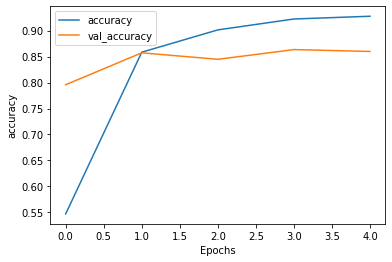

In [17]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
plot_graphs(history, 'accuracy')

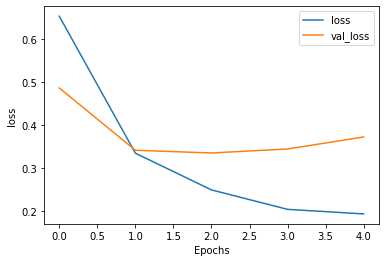

In [18]:
plot_graphs(history, 'loss')